# Cyberbullying Detection using logistic regression

# Imports

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

# Loading the Dataset
---

In [4]:
df = pd.read_csv('final_dataset_hinglish.csv' )
df

,headline,label
0,cock suck before you piss around on my work,-1
1,you are gay or antisemmitian archangel white ...,-1
2,fuck your filthy mother in the ass dry,-1
3,get fuck ed up get fuck ed up got a drink t...,-1
4,stupid peace of shit stop deleting my stuff ...,-1
...,...,...
18143,deepak chahal se baga chutiya maine nahi dekha...,-1
18144,carry ki maa ki chut,-1
18145,ram kapoor ko priya se pyaar hai kya ?,0
18146,kya ram kapoor ki behen ke chut mai mera lund ...,-1


In [5]:
df.head()

,headline,label
0,cock suck before you piss around on my work,-1
1,you are gay or antisemmitian archangel white ...,-1
2,fuck your filthy mother in the ass dry,-1
3,get fuck ed up get fuck ed up got a drink t...,-1
4,stupid peace of shit stop deleting my stuff ...,-1


In [6]:
df.tail()

,headline,label
18143,deepak chahal se baga chutiya maine nahi dekha...,-1
18144,carry ki maa ki chut,-1
18145,ram kapoor ko priya se pyaar hai kya ?,0
18146,kya ram kapoor ki behen ke chut mai mera lund ...,-1
18147,akshay kumar ki film aise aa rahi hai jaise su...,-1


In [7]:
df.shape

(18148, 2)

# EDA
---

# 1. Handling Null Values

In [8]:
df.isna().any()

headline    False
label       False
dtype: bool

In [9]:
df.isna().sum()

headline    0
label       0
dtype: int64

# 2. Handling Duplicate Values

In [10]:
df.nunique()

headline    17068
label           2
dtype: int64

In [11]:
df['headline'].nunique()

17068

# 3. Class Distributions

In [12]:
df['label'].value_counts()

label
-1    11661
 0     6487
Name: count, dtype: int64

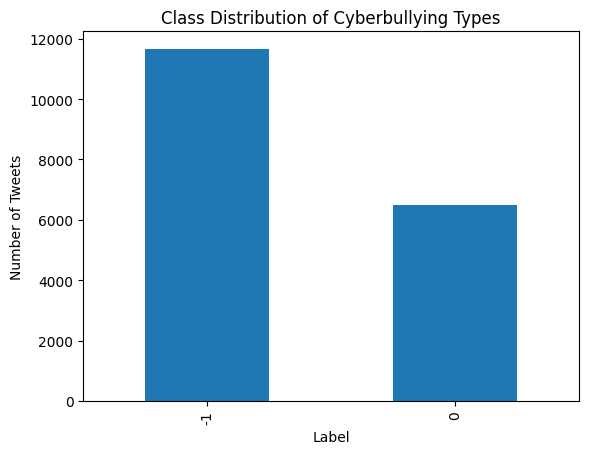

In [13]:
# Create a bar plot of the class distribution
class_counts = df['label'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Label')
plt.ylabel('Number of Tweets')
plt.show()

# 4. Word Count

In [14]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [15]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['headline'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [16]:
import nltk
nltk.download('stopwords')
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('fuck', 19401),
 ('suck', 5323),
 ('shit', 5171),
 ('ass', 4671),
 ('ing', 3798),
 ('wikipedia', 3614),
 ('nigger', 3485),
 ('page', 2855),
 ('article', 2846),
 ('like', 2637),
 ('bitch', 2554),
 ('go', 2497),
 ('u', 2477),
 ('dick', 2268),
 ('cunt', 2189),
 ('cock', 2150),
 ('talk', 2131),
 ('faggot', 2015),
 ('one', 1931),
 ('know', 1929),
 ('get', 1896),
 ('hate', 1703),
 ('would', 1694),
 ('people', 1519),
 ('please', 1478),
 ('block', 1451),
 ('hole', 1390),
 ('think', 1370),
 ('see', 1313),
 ('fat', 1312),
 ('user', 1287),
 ('edit', 1257),
 ('hai', 1240),
 ('penis', 1201),
 ('die', 1199),
 ('time', 1172),
 ('also', 1142),
 ('bull', 1131),
 ('want', 1102),
 ('sex', 1014),
 ('stupid', 1014),
 ('even', 1010),
 ('right', 988),
 ('make', 981),
 ('er', 972),
 ('jew', 947),
 ('wiki', 915),
 ('stop', 903),
 ('use', 892),
 ('good', 891),
 ('going', 873),
 ('well', 849),
 ('articles', 833),
 ('mother', 828),
 ('nipple', 825),
 ('thanks', 815),
 ('really', 808),
 ('idiot', 807),
 ('inform

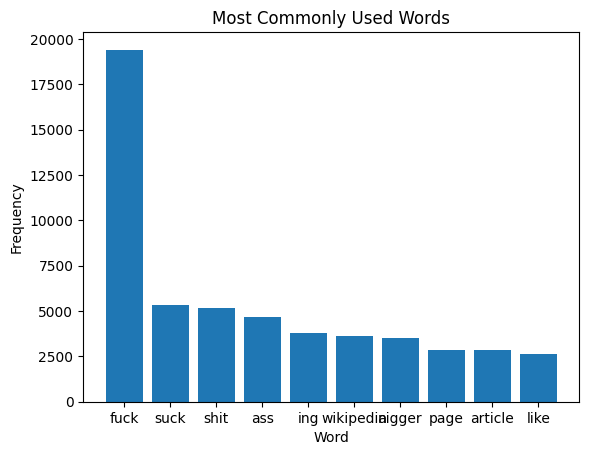

In [18]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# Visualizations
---

# 1. Wordclouds

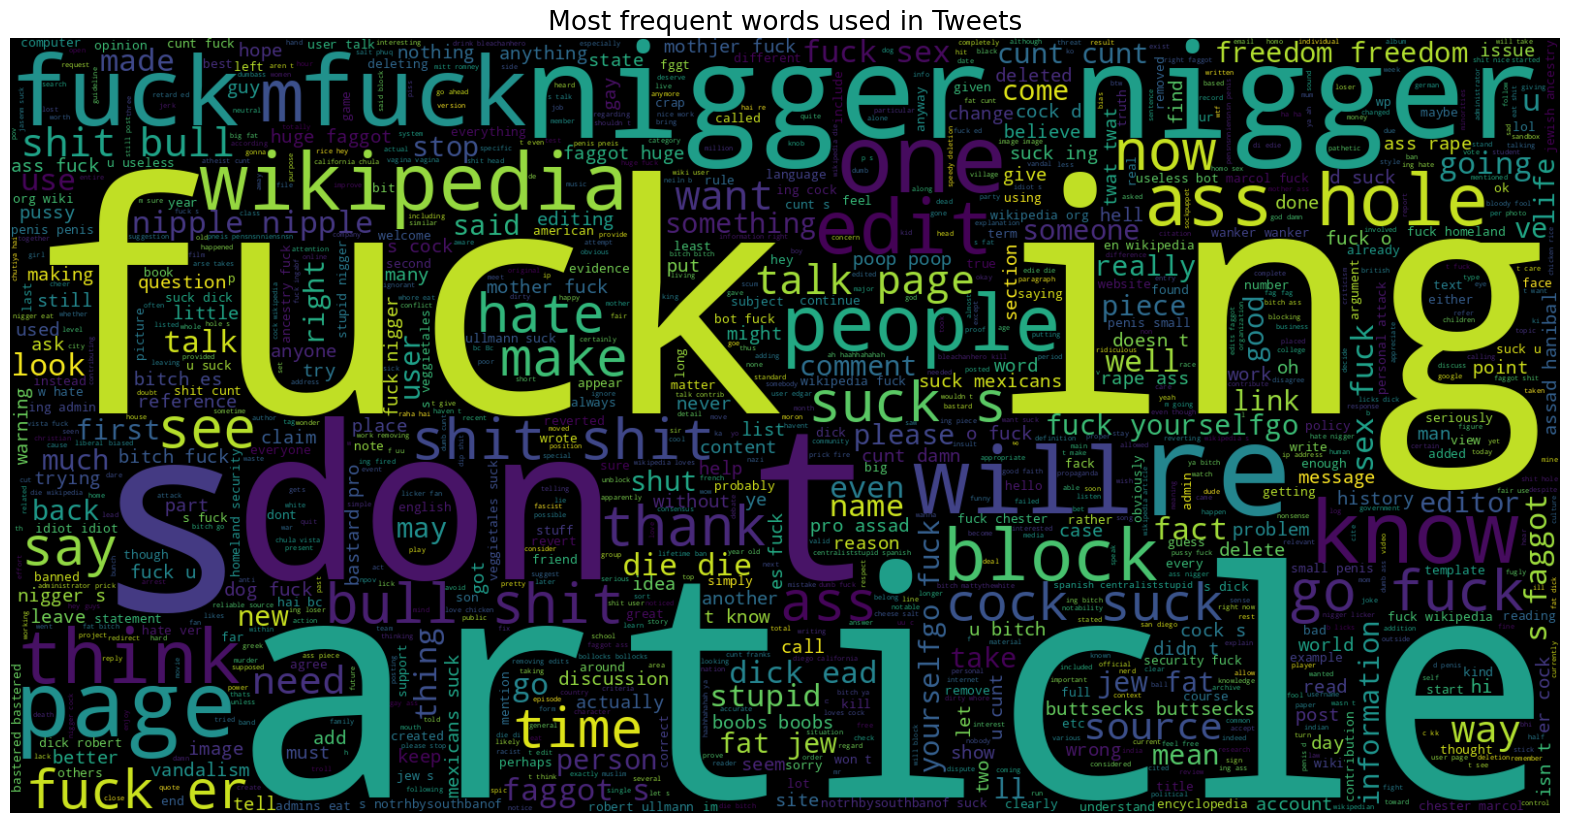

In [19]:
from wordcloud import WordCloud

text = ' '.join([word for word in df['headline']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Tweets', fontsize=19)
plt.show()

# 2. Sentiment Analysis Plot

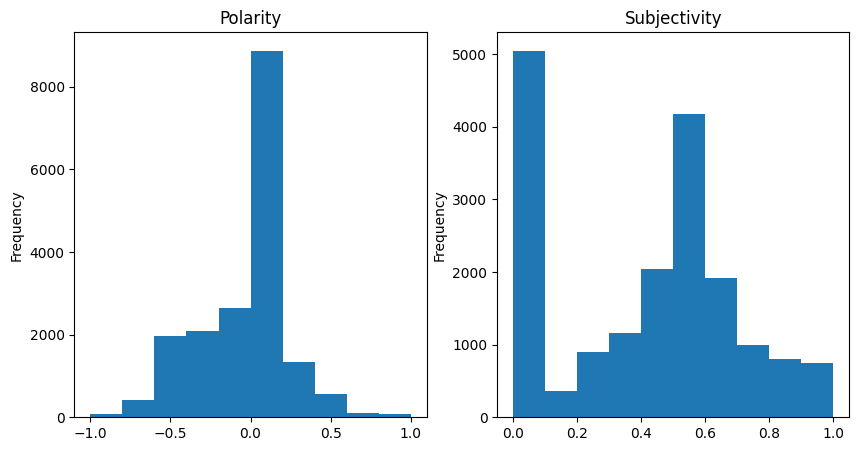

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# perform sentiment analysis on each text in DataFrame
sentiment_scores = []
for text in df['headline']:
    analysis = TextBlob(text)
    sentiment_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))

# create DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores, columns=['polarity', 'subjectivity'])

# plot distribution of sentiment scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sentiment_df['polarity'].plot(kind='hist', ax=axes[0], title='Polarity')
sentiment_df['subjectivity'].plot(kind='hist', ax=axes[1], title='Subjectivity')
plt.show()

# 3. Named Entity Recognition (NER) Plot

In [21]:
import spacy
from spacy import displacy

In [22]:
#sample text
text = df['headline'].iloc[4]

#load pre-trained NER model
nlp = spacy.load('en_core_web_sm')

#perform named entity recognition
doc = nlp(text)

#visualize named entities
displacy.render(doc, style='ent', jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


# 4. Part-of-Speech (POS) Tagging Plot

In [23]:
import spacy
from spacy import displacy

#sample text
text = df['headline'].iloc[1]

#load pre-trained POS tagging model
nlp = spacy.load('en_core_web_sm')

#perform POS tagging
doc = nlp(text)

#visualize POS tagging
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

# 5. Topic Modeling Visualization

In [24]:
!pip install pyLDAvis

In [25]:
import gensim
import pyLDAvis
from pyLDAvis import *
import pyLDAvis.gensim as gensimvis

# Preprocessing
tokens = [[word for word in sentence.split()] for sentence in df['headline'] ]
dictionary = gensim.corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

# Topic Modeling
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.304161 -0.157220       1        1  72.082952
3     -0.181031 -0.026805       2        1   8.741268
8     -0.007289  0.108159       3        1   6.369096
9      0.212478 -0.314373       4        1   2.524790
2      0.050601  0.128734       5        1   2.105479
7     -0.038865  0.069720       6        1   2.082775
5     -0.044615  0.039414       7        1   1.831045
4      0.080445  0.143074       8        1   1.659509
0      0.074892  0.001299       9        1   1.498969
1      0.157545  0.007999      10        1   1.104118, topic_info=       Term          Freq         Total Category  logprob  loglift
8       you  28017.000000  28017.000000  Default  30.0000  30.0000
33     fuck  11826.000000  11826.000000  Default  29.0000  29.0000
45       is  13048.000000  13048.000000  Default  28.0000  28.0000
77      the  34656.000000  34656.000000  Default  27.0000  27.0000
61        s   6523.000000   6523.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
38369   bhi     52.610919    401.544343  Topic10  -5.2437   2.4737
636       g     42.577820    184.556085  Topic10  -5.4553   3.0395
115    hole     46.488205    455.903320  Topic10  -5.3674   2.2230
43       in     62.143555  10528.412472  Topic10  -5.0771  -0.6263
77      the     49.963479  34656.775247  Topic10  -5.2953  -2.0358

[617 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
37543      3  0.012197      ,
37543      4  0.975771      ,
35576      3  0.015233      .
35576      4  0.106628      .
35576      5  0.685464      .
...      ...       ...    ...
39290     10  0.021452      😂
39365      3  0.021161  😂🤦‍♂️
39365      4  0.105804  😂🤦‍♂️
39365      9  0.825274  😂🤦‍♂️
39365     10  0.021161  😂🤦‍♂️

[2120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 9, 10, 3, 8, 6, 5, 1, 2])

# Natural Language Processing
---

# 1. Data Cleaning

In [26]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()

    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    # Join the words back into a string
    text = ' '.join(words)
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
%%time
import nltk
nltk.download('punkt')
tqdm.pandas()

df['cleaned_text'] = df['headline'].progress_apply(clean_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  0%|          | 0/18148 [00:00<?, ?it/s]

CPU times: user 2min 15s, sys: 16.1 s, total: 2min 31s
Wall time: 3min 5s


# 2. Feature Extraction

In [28]:
# Create the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['label']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Classification Model
---

# 1. Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression(max_iter=1000)

# 2. Predictions

In [32]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-1, -1,  0, ..., -1,  0, -1])

# 3. Accuracy Score

In [33]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9294765840220386


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

# 4. Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

array([[2159,  137],
       [ 119, 1215]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

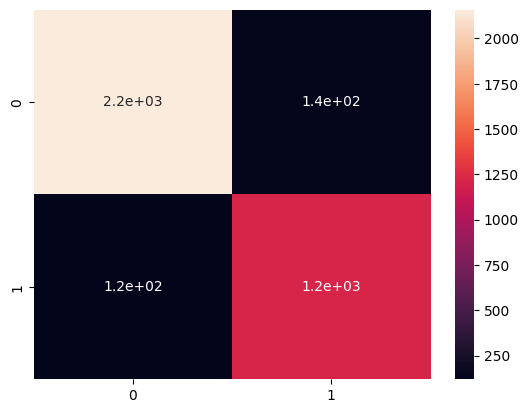

In [35]:
import seaborn as sns
sns.heatmap(cm, annot=True)

# 5. Classification Report

In [36]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.95      0.94      0.94      2296
           0       0.90      0.91      0.90      1334

    accuracy                           0.93      3630
   macro avg       0.92      0.93      0.92      3630
weighted avg       0.93      0.93      0.93      3630



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

# Thank You
---